# Group 8 Final Project

## Group Members: Gabriel Colón, Philip Felizarta, and Parker Christenson 

### Data set Selected: MNIST Dataset 

Description of the MNIST Data set: The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

## Exploratory Data Analysis (EDA) - Parker Christenson

## Here is the link that I used for the MNIST data set: 

https://www.kaggle.com/datasets/hojjatk/mnist-dataset

In [10]:
import pandas as pd
import numpy as np
import struct
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [11]:
# importing the model from tensorflow

(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [13]:
# getting the x_train and y_train data shapes 

print("X_train shape:",X_train.shape,"X_test shape:",X_test.shape)


X_train shape: (60000, 28, 28) X_test shape: (10000, 28, 28)


## We can now see that we have 60,000 images in our training set and 10,000 images in our test set.
### Which is a good split for our testing and training data. 

In [16]:
# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

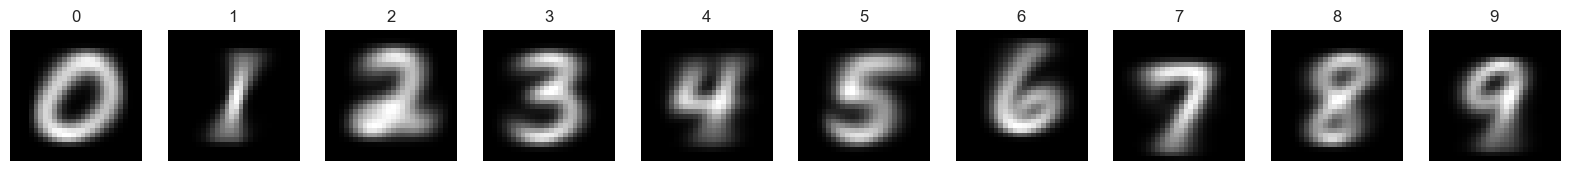

In [17]:
# Normalize the pixel values
x_train = x_train / 255.0

# Initialize a list to store the average images
average_digits = []

# Calculate the average image for each digit
for digit in range(10):
    # Extract all images for this digit
    images = x_train[y_train == digit]
    
    # Calculate the mean image
    mean_image = np.mean(images, axis=0)
    
    # Append the mean image to the list
    average_digits.append(mean_image)

# Plot the average images
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(average_digits[i], cmap='gray')
    ax.set_title(str(i))
    ax.axis('off')

plt.show()


## This output is what every Numbers average looks like in the MNIST data set. 

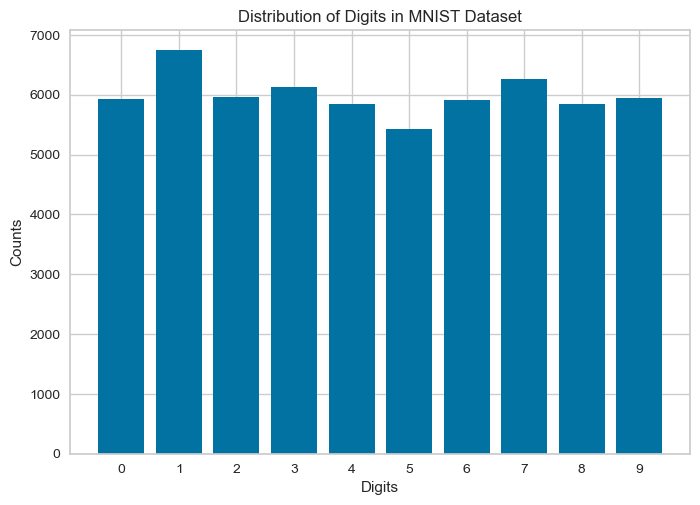

In [18]:
# Count the occurrences of each digit
unique, counts = np.unique(y_train, return_counts=True)

# Plot the histogram
plt.bar(unique, counts)
plt.xlabel('Digits')
plt.ylabel('Counts')
plt.title('Distribution of Digits in MNIST Dataset')
plt.xticks(unique)
plt.show()

In [19]:
unique, counts = np.unique(y_train, return_counts=True)

# Print the counts for each digit
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} occurrences")

# (Optional) You can also print the total number of images
print(f"Total number of images: {y_train.size}")

Digit 0: 5923 occurrences
Digit 1: 6742 occurrences
Digit 2: 5958 occurrences
Digit 3: 6131 occurrences
Digit 4: 5842 occurrences
Digit 5: 5421 occurrences
Digit 6: 5918 occurrences
Digit 7: 6265 occurrences
Digit 8: 5851 occurrences
Digit 9: 5949 occurrences
Total number of images: 60000


### Here is the distribution of the MNIST data set.

#### Digit 0: 5923 occurrences
#### Digit 1: 6742 occurrences
#### Digit 2: 5958 occurrences
#### Digit 3: 6131 occurrences
#### Digit 4: 5842 occurrences
#### Digit 5: 5421 occurrences
#### Digit 6: 5918 occurrences
#### Digit 7: 6265 occurrences
#### Digit 8: 5851 occurrences
#### Digit 9: 5949 occurrences
#### Total number of images: 60000

## U-map of the Data Set

In [23]:
import umap.umap_ as umap

mnist = tf.keras.datasets.mnist
(x_train, y_train), _ = mnist.load_data()
x_train_flat = x_train.reshape(-1, 28*28)  # Flatten the images

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(x_train_flat[:10000]) 

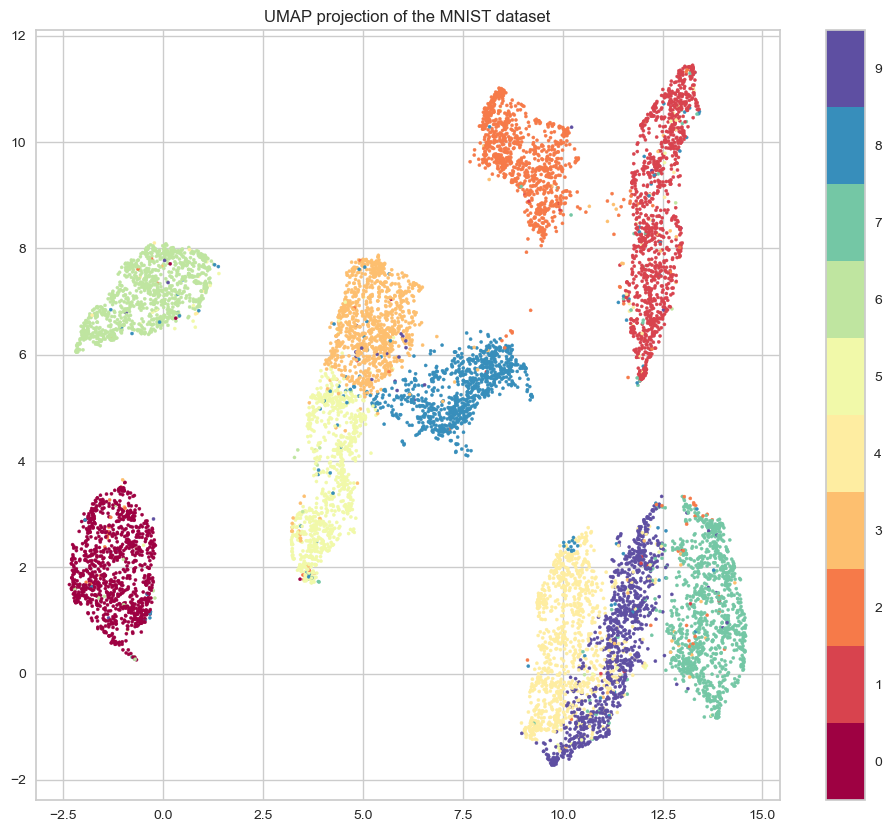

In [24]:
plt.figure(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train[:10000], cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the MNIST dataset')
plt.show()

#### This is a U-map of the MNIST data set. It is a 2D representation of the data set. It is a good way to visualize the data set, and be able to understand the way the data set looks. With that being said, the U-map function is a really good way to get a visual representation of the data set, and see how the data set is distributed, and some of the patterns and potential problems within the data set. 

In [26]:
import plotly.graph_objects as go

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), _ = mnist.load_data()
x_train_flat = x_train.reshape(-1, 28*28)

# Reduce dimensions to 3D using UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(x_train_flat[:10000])

# Create a Plotly 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=embedding_3d[:, 0],
    y=embedding_3d[:, 1],
    z=embedding_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_train[:10000],  # set color to the labels
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Update layout for a better view
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## This Concludes the EDA Portion of our Assignment